In [131]:
# load libraries and functions

In [155]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [156]:
%reload_ext autoreload
%autoreload 2

from utils/data_folder import 
#sys.path.append('/mnt/mnemo5/tao/code/MNF/src/tao_utilities/')

In [171]:
data_folder="/mnt/mnemo5/tao/MLG/task_1/data"
CAGE_train_folder=data_folder+"/CAGE-train"

data_small_folder="/mnt/mnemo5/tao/MLG/task_1/data_small"

In [ ]:
# first need to uncompress all files 
#(base) tao@deimos:~/MLG/data$ find -name '*.zip' -exec sh -c 'unzip -d "${1%.*}" "$1"' _ {} \;
# https://stackoverflow.com/questions/2374772/unzip-all-files-in-a-directory



In [133]:
# check sample files , this seems is the correct format of final input 
# can be ignored for now 

gex_predicted_samples=pd.read_csv(os.path.join(data_folder,"sample/gex_predicted.csv"),
                                 header=0,index_col=0,sep=",")
print(gex_predicted_samples.shape)
gex_predicted_samples.head(n=3)


(1984, 2)


,gene_name,gex_predicted
0,CAPN9,0.180352
1,ILF2,0.786083
2,ST6GALNAC5,0.267447


# check CAGE train  data. not feature data 

In [135]:
 
# X1 , X2 data were splited to train and validation data 
# X3 data were use as testing data

# notice here info files is not feature data. its infomation of output expression data 
X1_train_info=pd.read_csv(os.path.join(data_folder,"CAGE-train/X1_train_info.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X1_train_info.shape)
X1_train_info.head(n=6)

(14310, 6)


,chr,gene_start,gene_end,TSS_start,TSS_end,strand
gene_name,,,,,,
SLC20A1,chr2,112645939,112663825,112658362,112658412,+
C11orf58,chr11,16613132,16758340,16738643,16738693,+
ZSCAN9,chr6,28224886,28233487,28225263,28225313,+
CD19,chr16,28931965,28939342,28931956,28932006,+
TMEM123,chr11,102396332,102470384,102452789,102452839,-
POMC,chr2,25160853,25168903,25168640,25168690,-


In [136]:
print(len(set(X1_train_info.index)))

print(set(X1_train_info["chr"]))

14310
{'chr6', 'chr3', 'chr17', 'chr9', 'chr12', 'chr2', 'chr7', 'chr8', 'chr16', 'chr15', 'chr11', 'chr22', 'chr20', 'chr4', 'chr5', 'chr21', 'chr18', 'chr13', 'chr10'}


In [139]:
X1_train_y=pd.read_csv(os.path.join(data_folder,"CAGE-train/X1_train_y.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X1_train_y.shape)
X1_train_y.head(n=3)

(14310, 1)


,gex
gene_name,
SLC20A1,0.000000
C11orf58,2239.103328
ZSCAN9,19.798064


## create expression GCT file for IGV


In [169]:
def created_gct_file(data_folder: str, annotation_file: str, exps_file: str ) -> pd.DataFrame :
    
    """
    create gct files from gene expression data and annotation file 

    :param data_folder: folder to CAGE-train folder 
    :param annotation_file: file name of annotation data. Contain gene position in genome 
    :param exps_file:  file name of expression value data 
    
    :return: gct file as pd.DataFrame
    
    
    usuage example:
    X1_train_GCT_frame=created_gct_files(data_folder=CAGE_train_folder,
                                    annotation_label="X1_train_info.tsv",
                                    exps_label="X1_train_y.tsv")
    
    """
    
    
    info=pd.read_csv(os.path.join(data_folder,annotation_file),
                                 header=0,index_col=0,sep="\t")
    y=pd.read_csv(os.path.join(data_folder,exps_file),
                                 header=0,index_col=0,sep="\t")
    
    GCT_list=list()
    for index in info.index: 
        GCT_list.append([index,
                         " na |@"+info.loc[index,"chr"]+":"+str(info.loc[index,"gene_start"])+"-"+str(info.loc[index,"gene_end"])+"|",
                         y.loc[index,"gex"]])
    GCT_frame=pd.DataFrame(GCT_list,columns=["name","Description","sample 1"])

    return(GCT_frame)

In [170]:
X1_train_GCT_frame=created_gct_file(data_folder=CAGE_train_folder,
                                    annotation_file="X1_train_info.tsv",
                                    exps_file="X1_train_y.tsv")

print(X1_train_GCT_frame.shape)
X1_train_GCT_frame.head(n=3)



(14310, 3)


,name,Description,sample 1
0,SLC20A1,na |@chr2:112645939-112663825|,0.000000
1,C11orf58,na |@chr11:16613132-16758340|,2239.103328
2,ZSCAN9,na |@chr6:28224886-28233487|,19.798064


In [173]:
X1_train_GCT_frame.to_csv(data_small_folder+"/X1_train.gct",header=True,index=None,sep="\t")

In [141]:
X1_val_info=pd.read_csv(os.path.join(data_folder,"CAGE-train/X1_val_info.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X1_val_info.shape)
X1_val_info.head(n=3)

(1974, 6)


,chr,gene_start,gene_end,TSS_start,TSS_end,strand
gene_name,,,,,,
ECH1,chr19,38815422,38831841,38816220,38816270,-
CAMSAP3,chr19,7595863,7618304,7595901,7595951,+
MISP,chr19,751112,764318,758062,758112,+


##  check TSS, gene storat and end position

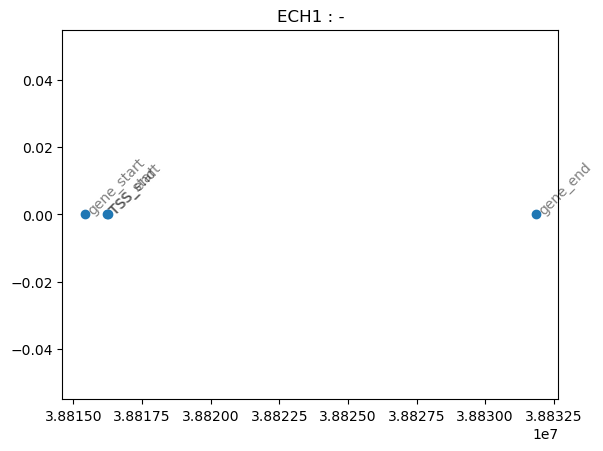

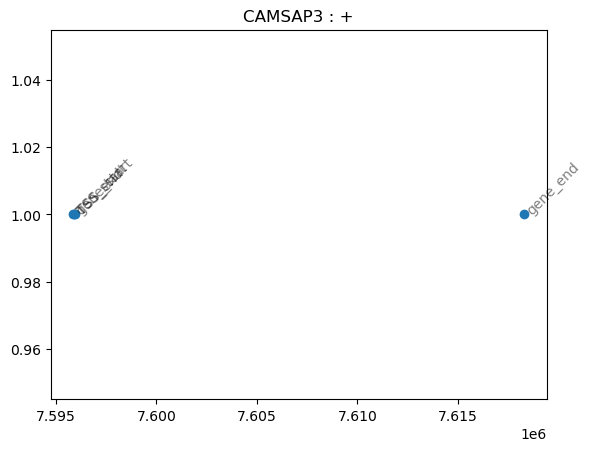

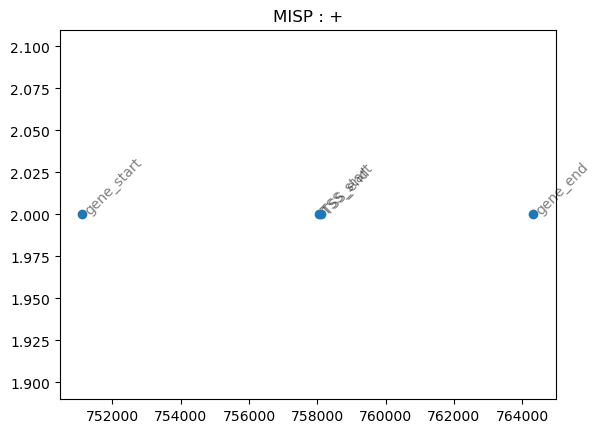

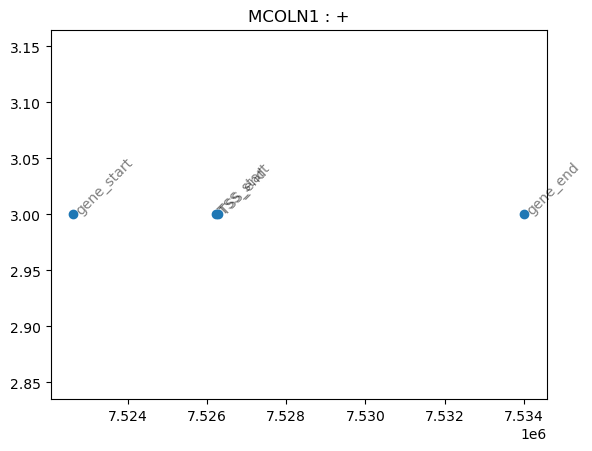

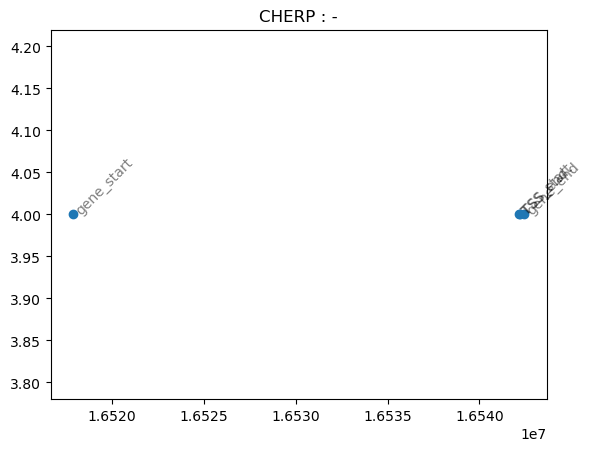

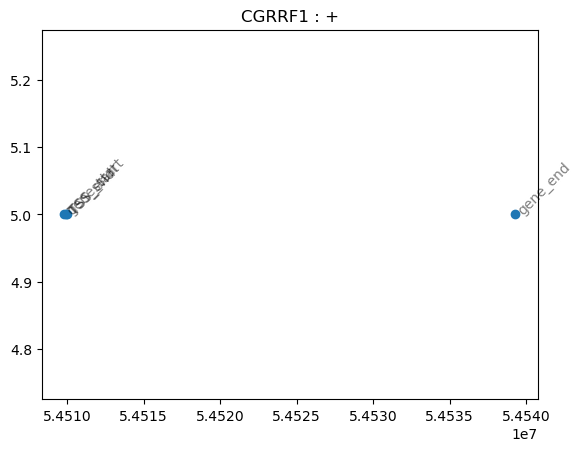

In [142]:
fake_range=1000
for sel_idx in range(6):
    plt.figure()
    coordinate=pd.DataFrame([(X1_val_info.loc[:,"gene_start"][sel_idx],sel_idx,"gene_start"),
                (X1_val_info.loc[:,"gene_end"][sel_idx],sel_idx,"gene_end"),
                (X1_val_info.loc[:,"TSS_start"][sel_idx],sel_idx,"TSS_start"),
                (X1_val_info.loc[:,"TSS_end"][sel_idx],sel_idx,"TSS_end"),
               ])
    plt.scatter(coordinate.iloc[:,0], coordinate.iloc[:,1])

    for i, txt in enumerate( coordinate.iloc[:,2]):
        plt.annotate(txt, (coordinate.iloc[i,0], coordinate.iloc[i,1]),
                    #fontsize=10,
                      alpha=0.5,
                     rotation=45,
                     size=10
                    )
    plt.title(X1_val_info.index[sel_idx]+" : "+X1_val_info.loc[:,"strand"][sel_idx])

    plt.show()

In [143]:
coordinate

,0,1,2
0,54509812,5,gene_start
1,54539292,5,gene_end
2,54509905,5,TSS_start
3,54509955,5,TSS_end


In [144]:
X1_val_y=pd.read_csv(os.path.join(data_folder,"CAGE-train/X1_val_y.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X1_val_y.shape)
X1_val_y.head(n=3)

(1974, 1)


,gex
gene_name,
ECH1,0.0
CAMSAP3,0.0
MISP,0.0


In [145]:
X2_train_info=pd.read_csv(os.path.join(data_folder,"CAGE-train/X2_train_info.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X2_train_info.shape)
X2_train_info.head(n=3)

(14310, 6)


,chr,gene_start,gene_end,TSS_start,TSS_end,strand
gene_name,,,,,,
SLC20A1,chr2,112645939,112663825,112658362,112658412,+
C11orf58,chr11,16613132,16758340,16738643,16738693,+
ZSCAN9,chr6,28224886,28233487,28225263,28225313,+


In [146]:
X2_train_y=pd.read_csv(os.path.join(data_folder,"CAGE-train/X2_train_y.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X2_train_y.shape)
X2_train_y.head(n=3)

(14310, 1)


,gex
gene_name,
SLC20A1,0.00000
C11orf58,2906.14534
ZSCAN9,9.41495


In [147]:
X2_val_info=pd.read_csv(os.path.join(data_folder,"CAGE-train/X2_val_info.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X2_val_info.shape)
X2_val_info.head(n=3)

(1974, 6)


,chr,gene_start,gene_end,TSS_start,TSS_end,strand
gene_name,,,,,,
ECH1,chr19,38815422,38831841,38816220,38816270,-
CAMSAP3,chr19,7595863,7618304,7595901,7595951,+
MISP,chr19,751112,764318,758062,758112,+


In [149]:
X2_val_y=pd.read_csv(os.path.join(data_folder,"CAGE-train/X2_val_y.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X2_val_y.shape)
X2_val_y.head(n=3)

(1974, 1)


,gex
gene_name,
ECH1,0.00000
CAMSAP3,1.05678
MISP,0.00000


In [151]:
X3_test_info=pd.read_csv(os.path.join(data_folder,"CAGE-train/X3_test_info.tsv"),
                                 header=0,index_col=0,sep="\t")
print(X3_test_info.shape)
X3_test_info.head(n=3)

(1984, 6)


,chr,gene_start,gene_end,TSS_start,TSS_end,strand
gene_name,,,,,,
CAPN9,chr1,230747384,230802003,230791876,230791926,+
ILF2,chr1,153661788,153671028,153664424,153664474,-
ST6GALNAC5,chr1,76867480,77067546,76867440,76867490,+


# DNase-bed data, and bed format description 
https://genome.ucsc.edu/FAQ/FAQformat.html#format12


ENCODE narrowPeak: Narrow (or Point-Source) Peaks format
This format is used to provide called peaks of signal enrichment based on pooled, normalized (interpreted) data. It is a BED6+4 format.

chrom - Name of the chromosome (or contig, scaffold, etc.).

chromStart - The starting position of the feature in the chromosome or scaffold. The first base in a chromosome is numbered 0.

chromEnd - The ending position of the feature in the chromosome or scaffold. The chromEnd base is not included in the display of the feature. For example, the first 100 bases of a chromosome are defined as chromStart=0, chromEnd=100, and span the bases numbered 0-99.

name - Name given to a region (preferably unique). Use "." if no name is assigned.

score - Indicates how dark the peak will be displayed in the browser (0-1000). If all scores were "'0"' when the data were submitted to the DCC, the DCC assigned scores 1-1000 based on signal value. Ideally the average signalValue per base spread is between 100-1000

strand - +/- to denote strand or orientation (whenever applicable). Use "." if no orientation is assigned.

signalValue - Measurement of overall (usually, average) enrichment for the region.

pValue - Measurement of statistical significance (-log10). Use -1 if no pValue is assigned.

qValue - Measurement of statistical significance using false discovery rate (-log10). Use -1 if no qValue is assigned.

peak - Point-source called for this peak; 0-based offset from chromStart. Use -1 if no point-source called.

In [152]:
DNase_bed_X1=pd.read_csv(os.path.join(data_folder,"DNase-bed/X1.bed"),
                                 header=None,index_col=None,sep="\t")
print(DNase_bed_X1.shape)
DNase_bed_X1.head(n=3)

(56452, 10)


,0,1,2,3,4,5,6,7,8,9
0,chr1,181405,181555,.,0,.,12.379543,-1,-1,75
1,chr1,267990,268140,.,0,.,12.379543,-1,-1,75
2,chr1,629160,629310,.,0,.,22.263896,-1,-1,75


# H3K27ac bed  data



In [153]:
H3K27ac_bed_X1=pd.read_csv(os.path.join(data_folder,"H3K27ac-bed/X1.bed"),
                                 header=None,index_col=None,sep="\t")
print(H3K27ac_bed_X1.shape)
H3K27ac_bed_X1.head(n=6)

(57887, 10)


,0,1,2,3,4,5,6,7,8,9
0,chr10,100000446,100000787,Peak_48796,20,.,4.62061,5.94877,4.02602,179
1,chr10,100005130,100005409,Peak_35045,28,.,6.22479,8.74197,6.70135,101
2,chr10,100005554,100009977,Peak_12003,96,.,12.84779,34.12514,31.48892,3918
3,chr10,100010071,100010666,Peak_13976,82,.,13.23118,28.94403,26.40645,302
4,chr10,100012807,100015958,Peak_3367,227,.,23.86291,82.44186,79.01792,897
5,chr10,100016143,100016330,Peak_47258,21,.,4.69033,6.35266,4.41893,129


# H3K4me1-bed data

In [154]:


H3K4me1_bed_X1=pd.read_csv(os.path.join(data_folder,"H3K4me1-bed/X1.bed"),
                                 header=None,index_col=None,sep="\t")
print(H3K4me1_bed_X1.shape)
H3K4me1_bed_X1.head(n=6)

(89812, 10)


,0,1,2,3,4,5,6,7,8,9
0,chr10,100000253,100001006,Peak_100923,26,.,2.91756,2.95990,1.12430,46
1,chr10,100006554,100007001,Peak_58802,59,.,3.97659,4.70508,2.57437,258
2,chr10,100010185,100010602,Peak_86672,39,.,3.57348,3.62402,1.66553,199
3,chr10,100013131,100014207,Peak_100579,28,.,2.17946,3.01855,1.18014,759
4,chr10,100014884,100015960,Peak_6684,218,.,7.98903,13.31145,10.08280,578
5,chr10,100016083,100016512,Peak_76544,45,.,3.82418,3.96142,1.96002,156


# H3K27ac bigwig  data

bigwig is binary data  seems used for IGV or UCSC browers 



# need slide from tutorial get more info , e.g. nomorlization 